In [1]:
import json
import seaborn as sns
import pandas as  pd
import matplotlib.pyplot as plt
import itertools
import numpy as np
import pickle

In [2]:
with open('/Users/charumehndiratta/Downloads/business_df.pickle', 'rb') as handle:
    business_df = pickle.load(handle)

In [3]:
with open('/Users/charumehndiratta/Downloads/review_df.pickle', 'rb') as handle:
    reviews_df = pickle.load(handle)

In [4]:
fin_ans = business_df[business_df['name'] == 'Chipotle Mexican Grill']

In [5]:
new_ans = pd.merge(reviews_df, fin_ans, on='business_id', how='inner')

In [6]:
def func1(str):
    return pd.to_datetime(str).year

b_df = new_ans['date'].apply(lambda row: func1(row))

In [7]:
new_ans['year'] = b_df

In [12]:
final_new_ans = new_ans[(new_ans['year'] >= 2006 )& (new_ans['year'] <= 2009) ]

In [13]:
total_stars_surrounding_rest = final_new_ans[['stars_x', 'year']]

In [14]:
review_count = total_stars_surrounding_rest['stars_x'].tolist()
year = total_stars_surrounding_rest['year'].tolist()

print (len(review_count))
print (len(year))

# total_ans = {2004:0, 2016:0, 2015:0, 2013:0, 2008:0, 2010:0, 2017:0, 2014:0, 2011:0, 2012:0, 2009:0, 2007:0, 2005:0, 2006:0}
# for key, val in final_ans.items():
#     total_ans[key] = sum(final_ans[key])/float(len(final_ans[key]))
        

final_result = {}
for i in range(len(review_count)):
    if year[i] in final_result:
        final_result[year[i]]['review_count'] = final_result[year[i]]['review_count'] + review_count[i]
        final_result[year[i]]['count'] = final_result[year[i]]['count'] + 1
    else:
        final_result[year[i]] = {'review_count' : review_count[i], 'count':1}

245
245


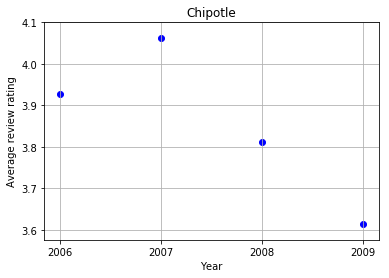

In [18]:
# final_result
import matplotlib.pyplot as plt

plt.xlabel("Year")
plt.ylabel("Average review rating")
plt.grid()

x_label = list(final_result.keys())
vals = list(final_result.values())

y_label = []
for val in vals:  
    y_label.append(val['review_count']/val['count'])
plt.scatter(
    x_label,
    y_label,
    color='b')

plt.xticks(x_label)
plt.title('Chipotle')
plt.savefig('fun_fact_chipotle.png')